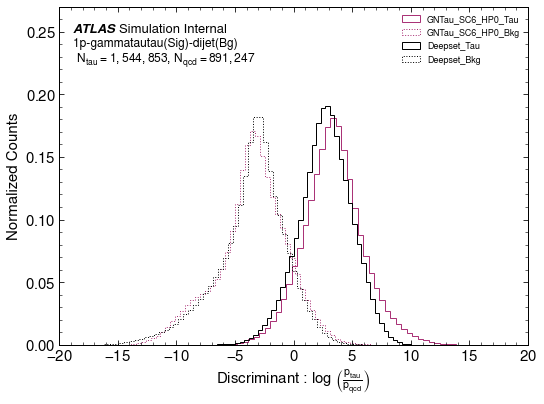

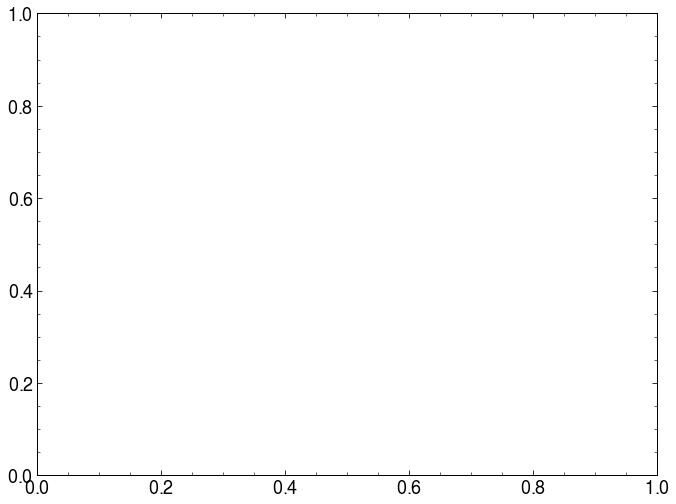

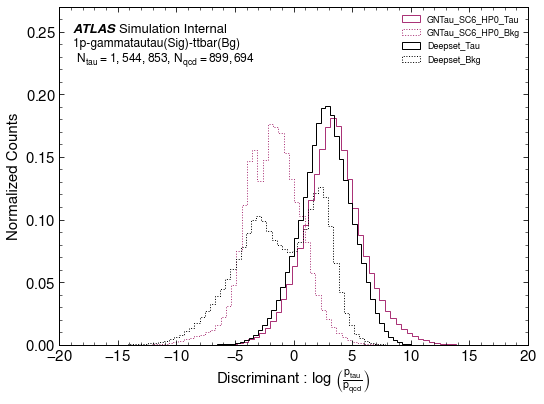

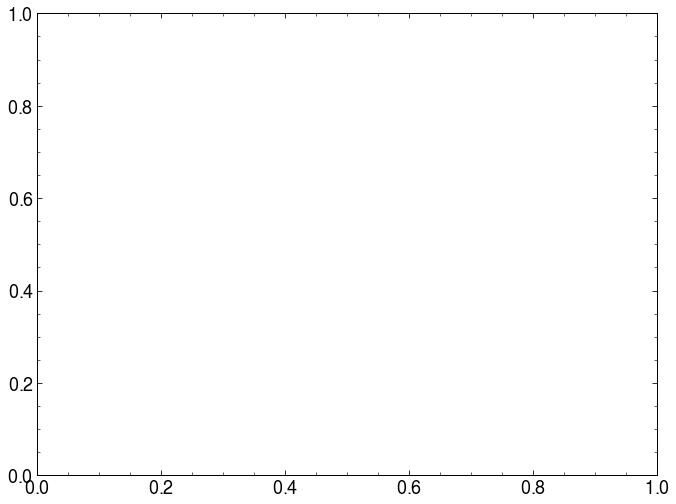

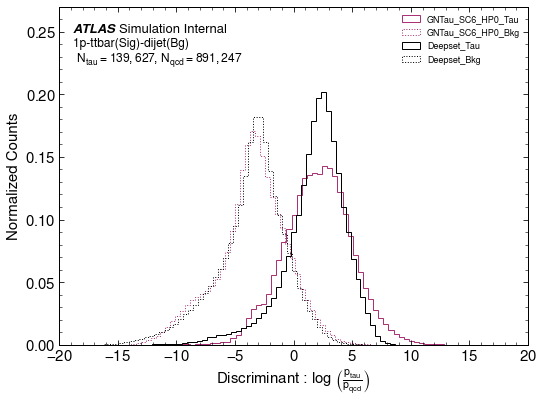

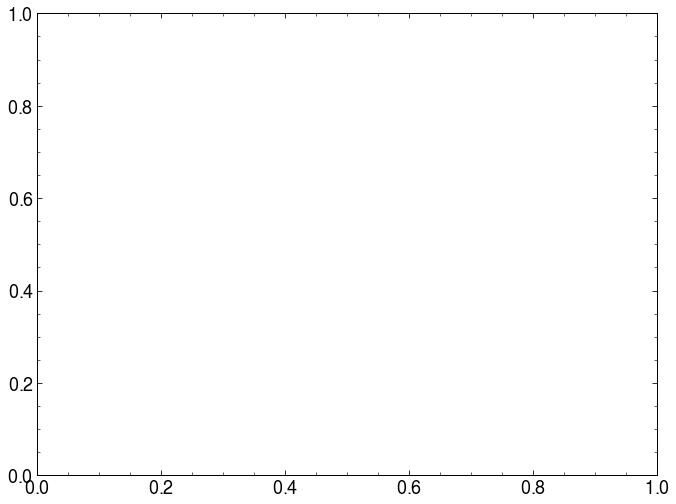

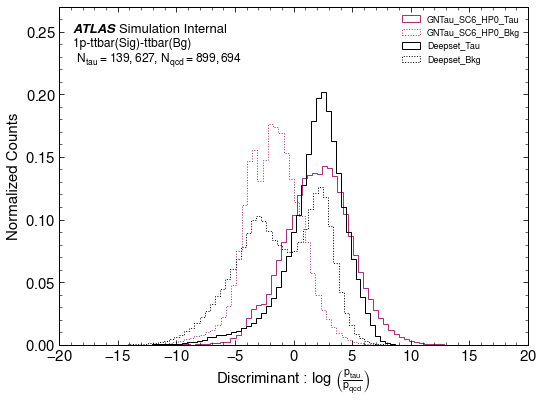

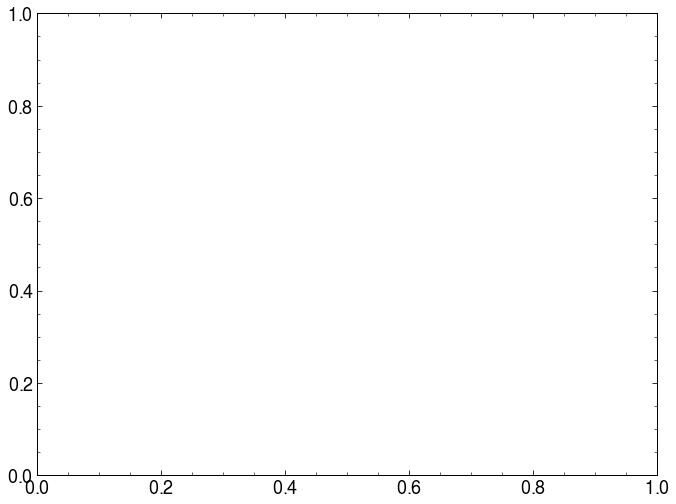

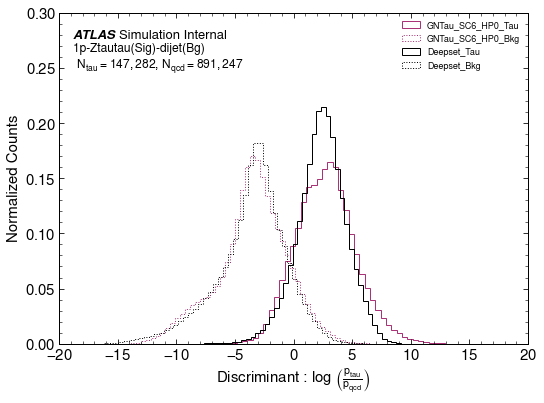

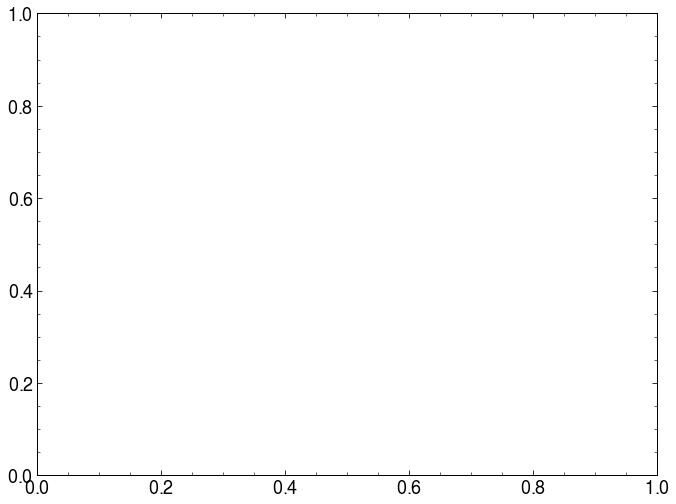

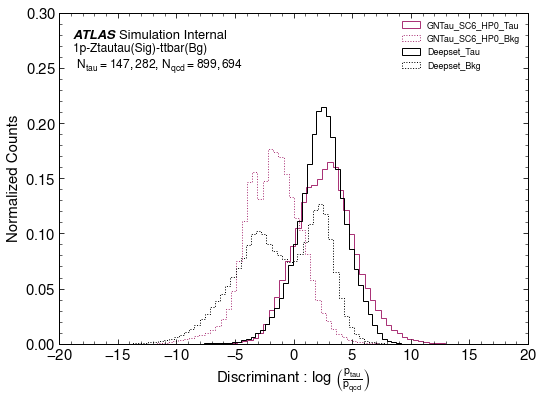

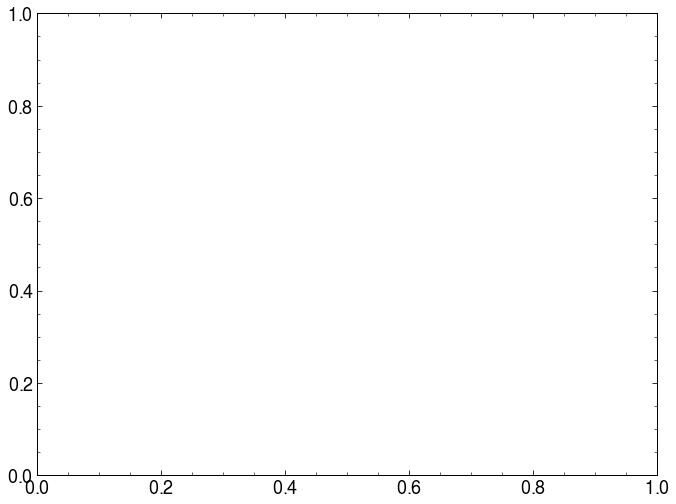

In [3]:
from metric_functions import *
model_list = {
    'GNTau_SC0' : ['GNTau_LS_HP0','Deepset'],
    'GNTau_SC1' : ['GNTau_LStt_HP0','Deepset'],
    'GNTau_SC6' : ['GNTau_SC6_HP0','Deepset'],
    'HypComp' : ['GNTau_LStt_HP0','GNTau_LStt_HP2','Deepset'],
    'DeepvsGNtaus' : ['GNTau_SC6_HP0','GNTau_SC5_HP0','GNTau_SC4_HP0','GNTau_SC3_HP0','GNTau_SC2_HP0','GNTau_LS_HP0','GNTau_LStt_HP0','Deepset'],
}

pt_slice = [
            # [20,30],[30,40],[40,50],[50,60],[60,70],[70,80],[80,90],[90,100],
            # [20,100],[100,280],[280,440],[440,500],
            [20,500],
	]

samples = [
           'gammatautau(Sig)-dijet(Bg)',
           'gammatautau(Sig)-ttbar(Bg)',
           'ttbar(Sig)-dijet(Bg)',
           'ttbar(Sig)-ttbar(Bg)',
           'Ztautau(Sig)-dijet(Bg)',
           'Ztautau(Sig)-ttbar(Bg)',
    ]

model_choice = 'GNTau_SC6'
for pt in pt_slice:
	for sample in samples:
		prong = '1p'
		models = model_list[model_choice]
		desc = f'{prong}-{sample}'
		networks = get_networks(prong,models,sample)
		results = {}
		for key, val in networks.items():
			results[key] = get_info(key,val,prong,pT_bound=pt) 
		reference_network = 'Deepset'
		plot_disc(results,reference_network,prong,desc,sample,f'{model_choice}{pt}')
		plot_roc(results,reference_network,prong,desc,sample,f'{model_choice}{pt}')
		plot_ptVsRej(results,reference_network,pt,prong,desc,sample,f'{model_choice}{pt}')
		# plot_rejection(results,reference_network,prong,desc,sample,f'{model_choice}{pt}')

             


In [22]:
model_list = {
    'GNTau_SC0' : ['GNTau_LS_HP0','Deepset'],
    'GNTau_SC1' : ['GNTau_LStt_HP0','Deepset'],
    'HypComp' : ['GNTau_LStt_HP0','GNTau_LStt_HP2','Deepset'],
    'DeepvsGNtaus' : ['GNTau_SC6_HP0','Deepset'],
}

pt_slice = [
            # [20,30],[30,40],[40,50],[50,60],[60,70],[70,80],[80,90],[90,100],
            # [20,100],[100,280],[280,440],[440,500],
            [20,500],
	]

samples = [
           'gammatautau(Sig)-dijet(Bg)',
           'gammatautau(Sig)-ttbar(Bg)',
           'ttbar(Sig)-dijet(Bg)',
           'ttbar(Sig)-ttbar(Bg)',
           'Ztautau(Sig)-dijet(Bg)',
           'Ztautau(Sig)-ttbar(Bg)',
    ]

model_choice = 'DeepvsGNtaus'

for pt in pt_slice:
	for sample in samples:
		prong = '1p'
		models = model_list[model_choice]
		desc = f'{prong}-{sample}'
		networks = get_networks(prong,models,sample)
		results = {}
		for key, val in networks.items():
			results[key] = get_info(key,val,prong,pT_bound=pt)
			closest_index = np.argmin(np.abs(results[key]['sig_eff'] - 0.94))
			closest_rej = results[key]['rej'][closest_index]
			print(closest_rej)

6.968910539608567
6.159274360746371
3.402698879753107
2.023789868161481
2.7807584905071683
2.497063751337842
1.602387300501718
1.5330092471898051
5.212763344134196
6.134431397381716
2.619821907995504
2.021611637657908


# $p_T$ Turn on

In [ ]:
import os

mode = '1'
plot_type = 'RNNvsGNTauZtautau'  
desc = 'Ztautau validation'

bins = np.linspace(20,500,30) #[0]+np.logspace(np.log10(20),np.log10(600),10)

if mode == '0':
    networks = networks_0p
    labels = labels_0p

elif mode == '1':
    networks = networks_1p
    labels = labels_1p
    sig_eff = np.linspace(0.9, 1, 101)
    rnn_wp = {'tight' : 0.94,
              'medium' : 0.97,
              'loose' : 0.99}

elif mode == 'm':
    networks = networks_mp
    labels = labels_mp
    sig_eff = np.linspace(0.7, 1, 121)
    rnn_wp = {'tight' : 0.80,
              'medium' : 0.91,
              'loose' : 0.98}
    only_RNNComp = ['GN2Tau_mp_R22_ExtraVars_302K','RNN']
    only_RNN = ['RNN']


reference = f'RNN_{mode}p'
results = {}
RNN_val = networks['RNN']
for key, val in networks.items():
    if key not in skiplist[plot_type]:
        continue
    
    if key != "RNN":
        results[key] = get_info(key,val,labels,sig_eff) 
        RNN_val = val
    if key == "RNN":
        results[f'{key}_{mode}p'] = get_info('RNN',RNN_val,labels,sig_eff)   

logger.info("Plotting bkg rejection for inclusive efficiency as a function of pt.")
# You can choose between different modes: "sig_eff", "bkg_eff", "sig_rej", "bkg_rej"


# Create the directory if it doesn't exist
path = f"plots/{plot_type}"
if not os.path.exists(path):
    os.makedirs(path)


for id,wp in rnn_wp.items():
    plot_bkg_rej = VarVsEffPlot(
    mode="bkg_rej",
    ylabel="Light-flavour jets rejection",
    xlabel=r"$p_{T}$ [GeV]",
    logy=True,
    logx=False,
    atlas_second_tag=f'{mode}-prong, {desc}',
    n_ratio_panels=1,
    leg_fontsize = 7,
    )
    for network in results.keys():
        plot_bkg_rej.add(
            VarVsEff(x_var_sig= results[network]['pt_tau'],
                     disc_sig=results[network]['disc_tau'],
                     x_var_bkg=results[network]['pt_bkg'],
                     disc_bkg=results[network]['disc_bkg'],
                     bins=bins,
                     working_point=wp,
                     disc_cut=None,
                     flat_per_bin=False,
                     label=labels[network],
                     colour='#228833' if network == f'RNN_{mode}p' else None,
                     ),
                     reference = (reference == f'RNN_{mode}p'),
                     )

    # plot_bkg_rej.ymin_ratio[0]=0.5
    # plot_bkg_rej.ymax_ratio[0]=1.5
    plot_bkg_rej.draw()
    plot_bkg_rej.savefig(f"plots/{mode}p-{plot_type}/pt_rej_{id}_{mode}p{plot_type}.pdf")

for id,wp in rnn_wp.items():
    plot_bkg_rej = VarVsEffPlot(
    mode="bkg_rej",
    ylabel="Light-flavour jets rejection",
    xlabel=r"$\eta$",
    logy=True,
    logx=False,
    atlas_second_tag=f'{mode}-prong, {desc}',
    n_ratio_panels=1,
    leg_fontsize = 7,
       )
    for network in results.keys():
        plot_bkg_rej.add(
            VarVsEff(x_var_sig= results[network]['eta_tau'],
                     disc_sig=results[network]['disc_tau'],
                     x_var_bkg=results[network]['eta_bkg'],
                     disc_bkg=results[network]['disc_bkg'],
                     bins=64,
                     working_point=wp,
                     disc_cut=None,
                     flat_per_bin=False,
                     label=labels[network],
                     colour='#228833' if network == f'RNN_{mode}p' else None,
                     ),
                     reference = (reference == f'RNN_{mode}p'),
                     )
    # plot_bkg_rej.ymin= 7.5
    # plot_bkg_rej.ymax= 20
    # plot_bkg_rej.ymin_ratio[0]=0.75
    # plot_bkg_rej.ymax_ratio[0]=1.50
    plot_bkg_rej.draw()
    plot_bkg_rej.savefig(f"plots/{mode}p-{plot_type}/eta_rej_{id}_{mode}p{plot_type}.pdf")


for id,wp in rnn_wp.items():
    plot_sig_eff = VarVsEffPlot(
    mode="sig_eff",
    ylabel="Tau jets efficiency",
    xlabel=r"$p_{T}$ [GeV]",
    logy=False,
    logx=False,
    atlas_second_tag=f'{mode}-prong, {desc}',
    n_ratio_panels=1,
    leg_fontsize = 7,
    )
    for network in results.keys():
        plot_sig_eff.add(
            VarVsEff(x_var_sig= results[network]['pt_tau'],
                     disc_sig=results[network]['disc_tau'],
                     x_var_bkg=results[network]['pt_bkg'],
                     disc_bkg=results[network]['disc_bkg'],
                     bins=bins,
                     working_point=wp,
                     disc_cut=None,
                     flat_per_bin=False,
                     label=labels[network],
                     colour='#228833' if network == f'RNN_{mode}p' else None, 
                     ),
                     reference = (reference == f'RNN_{mode}p'),
                     )
    # plot_sig_eff.ymin= 0.94
    # plot_sig_eff.ymax= 1.02
    # plot_sig_eff.ymin_ratio[0]=0.97
    # plot_sig_eff.ymax_ratio[0]=1.09
    plot_sig_eff.draw_hline(wp)
    plot_sig_eff.draw()
    plot_sig_eff.savefig(f"plots/{mode}p-{plot_type}/pt_eff_{id}_{mode}p{plot_type}.pdf")


for id,wp in rnn_wp.items():
    plot_sig_eff = VarVsEffPlot(
    mode="sig_eff",
    ylabel="Tau jets efficiency",
    xlabel=r"$\eta$",
    logy=False,
    logx=False,
    atlas_second_tag=f'{mode}-prong, {desc}',
    n_ratio_panels=1,
    leg_fontsize = 7,
    )
    for network in results.keys():
        plot_sig_eff.add(
            VarVsEff(x_var_sig= results[network]['eta_tau'],
                     disc_sig=results[network]['disc_tau'],
                     x_var_bkg=results[network]['eta_bkg'],
                     disc_bkg=results[network]['disc_bkg'],
                     bins=64,
                     working_point=wp,
                     disc_cut=None,
                     flat_per_bin=False,
                     label=labels[network],
                     colour='#228833' if network == f'RNN_{mode}p' else None,
                     ),
                     reference = (reference == f'RNN_{mode}p'),
                     )
    # plot_sig_eff.ymin= 0.94
    # plot_sig_eff.ymax= 1
    # plot_sig_eff.ymin_ratio[0]=0.980
    # plot_sig_eff.ymax_ratio[0]=1.040
    plot_sig_eff.draw_hline(wp)
    plot_sig_eff.draw()
    plot_sig_eff.savefig(f"plots/{mode}p-{plot_type}/eta_eff_{id}_{mode}p{plot_type}.pdf")

  